In [44]:
import numpy as np
import os, shutil
import tensorflow as tf
import pandas as pd
import random
import tensorflow.keras.backend as K

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    K.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
HH = pd.read_csv('HH_daily.csv')
WTI = pd.read_csv('WTI_daily.csv')
gold = pd.read_csv('COMEX_Gold_daily.csv')
copper = pd.read_csv('COMEX_Copper_daily.csv')
nickel = pd.read_csv('Nickel_daily.csv')
zinc = pd.read_csv('Zinc_daily.csv')

# HH

In [4]:
HH.dropna(inplace=True)
HH.reset_index(drop=True,inplace=True)

In [5]:
num = 5

lags = range(1, (1+num))
HH = HH.assign(**{
    '{} (t-{})'.format('HH_daily', t): HH["HH_daily"].shift(t)
    for t in lags
})

In [6]:
for i in range(num):
    HH.drop([i],inplace=True)

HH.reset_index(drop=True,inplace=True)

In [7]:
HH1 = HH.loc[:int((len(HH)-1)*0.2209241),]
HH2 = HH.loc[int((len(HH)-1)*0.2209241)+1:int((len(HH)-1)*0.2710214),]
HH3 = HH.loc[int((len(HH)-1)*0.2710214)+1:int((len(HH)-1)*0.3218269),]
HH4 = HH.loc[int((len(HH)-1)*0.3218269)+1:int((len(HH)-1)*0.7072048),]
HH5 = HH.loc[int((len(HH)-1)*0.7072048)+1:int((len(HH)-1)*0.7571252),]
HH6 = HH.loc[int((len(HH)-1)*0.7571252)+1:int((len(HH)-1)*0.9355638),]
HH7 = HH.loc[int((len(HH)-1)*0.9355638)+1:len(HH)-251,]

In [8]:
frames = [HH1,HH2,HH3,HH4,HH5,HH6,HH7]
HH_predict = pd.concat(frames)
HH_forecasting = HH.loc[(len(HH)-250):len(HH),:]

In [9]:
X_train = HH_predict.drop("HH_daily", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = HH_predict["HH_daily"].values
X_forecast = HH_forecasting.drop("HH_daily", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = HH_forecasting["HH_daily"].values

# WTI

In [3]:
WTI.dropna(inplace=True)
WTI.reset_index(drop=True,inplace=True)

In [16]:
num = 2

lags = range(1, (1+num))
WTI = WTI.assign(**{
    '{} (t-{})'.format('WTI_daily', t): WTI["WTI_daily"].shift(t)
    for t in lags
})

In [17]:
for i in range(num):
    WTI.drop([i],inplace=True)

WTI.reset_index(drop=True,inplace=True)

In [22]:
WTI1 = WTI.loc[:int((len(WTI)-1)*0.6731817),]
WTI2 = WTI.loc[int((len(WTI)-1)*0.6731817)+1:int((len(WTI)-1)*0.7288557),]
WTI3 = WTI.loc[int((len(WTI)-1)*0.7288557)+1:int((len(WTI)-1)*0.8534707),]
WTI4 = WTI.loc[int((len(WTI)-1)*0.8534707)+1:len(WTI)-251,]

In [27]:
frames = [WTI2,WTI3,WTI4]
WTI_predict = pd.concat(frames)
WTI_forecasting = WTI.loc[(len(WTI)-250):len(WTI),:]

In [30]:
X_train = WTI_predict.drop("WTI_daily", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = WTI_predict["WTI_daily"].values
X_forecast = WTI_forecasting.drop("WTI_daily", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = WTI_forecasting["WTI_daily"].values

# Gold

In [41]:
gold.dropna(inplace=True)
gold.reset_index(drop=True,inplace=True)

In [43]:
num = 1

lags = range(1, (1+num))
gold = gold.assign(**{
    '{} (t-{})'.format('Gold', t): gold["Gold"].shift(t)
    for t in lags
})

In [44]:
for i in range(num):
    gold.drop([i],inplace=True)

gold.reset_index(drop=True,inplace=True)

In [50]:
gold1 = gold.loc[:int((len(gold)-1)*0.3824164),]
gold2 = gold.loc[int((len(gold)-1)*0.3824164)+1:int((len(gold)-1)*0.4997303),]
gold3 = gold.loc[int((len(gold)-1)*0.4997303)+1:len(gold)-251,]

In [51]:
frames = [gold2,gold3]
gold_predict = pd.concat(frames)
gold_forecasting = gold.loc[(len(gold)-250):len(gold),:]

In [52]:
X_train = gold_predict.drop("Gold", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = gold_predict["Gold"].values
X_forecast = gold_forecasting.drop("Gold", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = gold_forecasting["Gold"].values

# Copper

In [3]:
copper.dropna(inplace=True)
copper.reset_index(drop=True,inplace=True)

In [4]:
num = 2

lags = range(1, (1+num))
copper = copper.assign(**{
    '{} (t-{})'.format('Copper', t): copper["Copper"].shift(t)
    for t in lags
})

In [5]:
for i in range(num):
    copper.drop([i],inplace=True)

copper.reset_index(drop=True,inplace=True)

In [6]:
copper1 = copper.loc[:int((len(copper)-1)*0.3531537),]
copper2 = copper.loc[int((len(copper)-1)*0.3531537)+1:int((len(copper)-1)*0.4390108),]
copper3 = copper.loc[int((len(copper)-1)*0.4390108)+1:len(copper)-251,]

In [7]:
frames = [copper2,copper3]
copper_predict = pd.concat(frames)
copper_forecasting = copper.loc[(len(copper)-250):len(copper),:]

In [8]:
X_train = copper_predict.drop("Copper", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = copper_predict["Copper"].values
X_forecast = copper_forecasting.drop("Copper", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = copper_forecasting["Copper"].values

# Nickel

In [69]:
nickel.dropna(inplace=True)
nickel.reset_index(drop=True,inplace=True)

In [70]:
num = 1

lags = range(1, (1+num))
nickel = nickel.assign(**{
    '{} (t-{})'.format('Nickel', t): nickel["Nickel"].shift(t)
    for t in lags
})

In [71]:
for i in range(num):
    nickel.drop([i],inplace=True)

nickel.reset_index(drop=True,inplace=True)

In [72]:
nickel1 = nickel.loc[:int((len(nickel)-1)*0.3346603),]
nickel2 = nickel.loc[int((len(nickel)-1)*0.3346603)+1:int((len(nickel)-1)*0.3870754),]
nickel3 = nickel.loc[int((len(nickel)-1)*0.3870754)+1:len(nickel)-251,]

In [73]:
frames = [nickel2,nickel3]
nickel_predict = pd.concat(frames)
nickel_forecasting = nickel.loc[(len(nickel)-250):len(nickel),:]

In [74]:
X_train = nickel_predict.drop("Nickel", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = nickel_predict["Nickel"].values
X_forecast = nickel_forecasting.drop("Nickel", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = nickel_forecasting["Nickel"].values

# Zinc

In [75]:
zinc.dropna(inplace=True)
zinc.reset_index(drop=True,inplace=True)

In [76]:
num = 1

lags = range(1, (1+num))
zinc = zinc.assign(**{
    '{} (t-{})'.format('Zinc', t): zinc["Zinc"].shift(t)
    for t in lags
})

In [77]:
for i in range(num):
    zinc.drop([i],inplace=True)

zinc.reset_index(drop=True,inplace=True)

In [81]:
zinc1 = zinc.loc[:int((len(zinc)-1)*0.3694411),]
zinc2 = zinc.loc[int((len(zinc)-1)*0.3694411)+1:int((len(zinc)-1)*0.4212133),]
zinc3 = zinc.loc[int((len(zinc)-1)*0.4212133)+1:int((len(zinc)-1)*0.4741803),]
zinc4 = zinc.loc[int((len(zinc)-1)*0.4741803)+1:len(zinc)-251,]

In [82]:
frames = [zinc2,zinc3,zinc4]
zinc_predict = pd.concat(frames)
zinc_forecasting = zinc.loc[(len(zinc)-250):len(zinc),:]

In [95]:
X_train = zinc_predict.drop("Zinc", axis=1)
X_train = X_train.drop("Date", axis=1)
y_train = zinc_predict["Zinc"].values
X_forecast = zinc_forecasting.drop("Zinc", axis=1)
X_forecast = X_forecast.drop("Date", axis=1)
y_forecast = zinc_forecasting["Zinc"].values

# Data Graph

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(HH["HH_daily"])

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(WTI["WTI_daily"])

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(gold["Gold"])

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(copper["Copper"])

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(nickel["Nickel"])

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(zinc["Zinc"])

# RandomForestRegressor

In [17]:
from sklearn.model_selection import GridSearchCV

#training model with k-fold cross validation
def train_model_with_cv(model, params, X_train, y_train):
    gs_clf = GridSearchCV(model, params, n_jobs=-2, cv=5)
    gs_clf = gs_clf.fit(X_train, y_train)
    model = gs_clf.best_estimator_
    
    return model

In [47]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)

parameters = {'n_estimators': [250,500,750,1000], 
              'max_depth': [10,20],
              'min_samples_split': [5,10],
              'min_samples_leaf': [5,10,20]
             }

rnd_best = train_model_with_cv(rfr, parameters, X_train, y_train)
print(rnd_best)
forecast_result = rnd_best.predict(X_forecast)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


# Keras

In [35]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_forecast_scaled = scaler.transform(X_forecast)

X_train_reshape = X_train_scaled.reshape(len(X_train_scaled),5,1)
y_train_reshape = y_train.reshape(len(y_train),1)
X_forecast_reshape = X_forecast_scaled.reshape(len(X_forecast_scaled),5,1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import model_from_json
import optuna
from optuna.pruners import SuccessiveHalvingPruner
from optuna.samplers import TPESampler
from optuna.integration import TFKerasPruningCallback

# Keras-ANN

In [26]:
folder = './saved_model/ANN'
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
    except Exception as e:
        print(e)

def objective(trial):
    
    reset_graph()
    model = Sequential()
    model.add(Dense(units=trial.suggest_int('units',10,200), input_dim=5, kernel_initializer='he_normal', 
                    bias_initializer='he_normal', activation='elu', 
                    kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
    model.add(BatchNormalization(beta_initializer='he_normal',gamma_initializer='he_normal',moving_mean_initializer='he_normal', 
                                 moving_variance_initializer='he_normal',beta_regularizer=l1_l2(l1=0.01,l2=0.01),
                                 gamma_regularizer=l1_l2(l1=0.01,l2=0.01)))
    model.add(Dropout(rate=trial.suggest_uniform('rate',0,0.5)))
    model.add(Dense(units=1, kernel_initializer='he_normal', bias_initializer='he_normal', activation='linear', 
                    kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
    
    optimizer = Adam(lr=trial.suggest_uniform('lr',0.001,0.1), beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_absolute_percentage_error', optimizer=optimizer)
    
    early_stop = EarlyStopping(monitor='val_loss',patience=30,verbose=1,restore_best_weights=True)
    pruning_callback = TFKerasPruningCallback(trial, 'val_loss')

    model.fit(X_train_scaled,y_train,epochs=1000,batch_size=50,verbose=0,validation_split=0.3,callbacks=[early_stop,pruning_callback])
    
    model_json = model.to_json()
    with open("./saved_model/ANN/model_{}.json".format(trial.number),"w") as json_file:
        json_file.write(model_json)
    model.save_weights("./saved_model/ANN/model_{}.h5".format(trial.number))
    
    forecast_result=model.predict(X_forecast_scaled)
    
    y_predict = np.zeros(250)
    
    for i in range(len(forecast_result)):
        y_predict[i] = forecast_result[i]
        
    mape1 = np.abs((y_forecast - y_predict)/(y_forecast+0.00000001))
    mape2 = 0
    
    for i in range(len(mape1)):
        mape2 += mape1[i]
        
    mape3 = 100 * (mape2 / len(mape1))
    
    return mape3

sampler = TPESampler(**TPESampler.hyperopt_parameters(), seed=42)
pruner = SuccessiveHalvingPruner(min_resource=1, reduction_factor=2, min_early_stopping_rate=1)
study = optuna.create_study(pruner=pruner, sampler=sampler)
study.optimize(objective, n_trials=10, n_jobs=1)

print(study.best_params)

D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:27:31,484] Setting status of trial#0 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:27:42,086] Setting status of trial#1 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:27:46,840] Setting status of trial#2 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered 

Restoring model weights from the end of the best epoch.
Epoch 00086: early stopping


[I 2019-11-20 14:28:07,401] Finished trial#3 resulted in value: 2.506845079075726. Current best value is 2.506845079075726 with parameters: {'units': 113, 'rate': 0.35403628889802274, 'lr': 0.0030378649352844423}.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:28:09,080] Setting status of trial#4 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:28:13,976] Setting status of trial#5 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-2

{'units': 113, 'rate': 0.35403628889802274, 'lr': 0.0030378649352844423}


In [30]:
json_file = open("./saved_model/ANN/model_{}.json".format(study.best_trial.number),"r")
loaded_model_json = json_file.read()
json_file.close()
best_model = model_from_json(loaded_model_json)
best_model.load_weights("./saved_model/ANN/model_{}.h5".format(study.best_trial.number))
forecast_result=best_model.predict(X_forecast_scaled)

# Keras-RNN

In [46]:
folder = './saved_model/RNN'
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
    except Exception as e:
        print(e)

def objective(trial):
    
    reset_graph()
    model = Sequential()
    model.add(SimpleRNN(units=trial.suggest_int('units',10,200), input_shape=(5,1), kernel_initializer='he_normal',
                        recurrent_initializer='he_normal', bias_initializer='he_normal', activation='elu', 
                        kernel_regularizer=l1_l2(l1=0.01,l2=0.01), recurrent_regularizer=l1_l2(l1=0.01,l2=0.01), 
                        bias_regularizer=l1_l2(l1=0.01,l2=0.01), activity_regularizer=l1_l2(l1=0.01,l2=0.01)))
    model.add(BatchNormalization(beta_initializer='he_normal',gamma_initializer='he_normal',moving_mean_initializer='he_normal', 
                                 moving_variance_initializer='he_normal',beta_regularizer=l1_l2(l1=0.01,l2=0.01),
                                 gamma_regularizer=l1_l2(l1=0.01,l2=0.01)))
    model.add(Dropout(rate=trial.suggest_uniform('rate',0,0.5)))
    model.add(Dense(units=1, kernel_initializer='he_normal', bias_initializer='he_normal', activation='linear', 
                    kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
    
    adam=Adam(lr=trial.suggest_uniform('lr',0.001,0.1), beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_absolute_percentage_error', optimizer=adam)
    
    early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
    pruning_callback = TFKerasPruningCallback(trial, 'val_loss')
    
    model.fit(X_train_reshape,y_train_reshape,epochs=1000,batch_size=50,verbose=0,validation_split=0.3,
              callbacks=[early_stop,pruning_callback])
    
    model_json = model.to_json()
    with open("./saved_model/RNN/model_{}.json".format(trial.number),"w") as json_file:
        json_file.write(model_json)
    model.save_weights("./saved_model/RNN/model_{}.h5".format(trial.number))
    
    forecast_result=model.predict(X_forecast_reshape)
    
    y_predict = np.zeros(250)
    
    for i in range(len(forecast_result)):
        y_predict[i] = forecast_result[i]
        
    mape1 = np.abs((y_forecast - y_predict)/(y_forecast+0.00000001))
    mape2 = 0
    
    for i in range(len(mape1)):
        mape2 += mape1[i]
        
    mape3 = 100 * (mape2 / len(mape1))
    
    return mape3

sampler = TPESampler(**TPESampler.hyperopt_parameters(), seed=42)
pruner = SuccessiveHalvingPruner(min_resource=1, reduction_factor=2, min_early_stopping_rate=1)
study = optuna.create_study(pruner=pruner, sampler=sampler)
study.optimize(objective, n_trials=10, n_jobs=1)

print(study.best_params)

Restoring model weights from the end of the best epoch.
Epoch 00056: early stopping


[I 2019-11-20 14:54:02,550] Finished trial#0 resulted in value: 3.3947299953607404. Current best value is 3.3947299953607404 with parameters: {'units': 112, 'rate': 0.3982714934301164, 'lr': 0.019160044196750218}.
[I 2019-11-20 14:54:05,805] Setting status of trial#1 as TrialState.PRUNED. Trial was pruned at epoch 2.
[I 2019-11-20 14:54:13,466] Setting status of trial#2 as TrialState.PRUNED. Trial was pruned at epoch 2.


Restoring model weights from the end of the best epoch.
Epoch 00148: early stopping


[I 2019-11-20 14:55:20,803] Finished trial#3 resulted in value: 2.6774587487931036. Current best value is 2.6774587487931036 with parameters: {'units': 113, 'rate': 0.35403628889802274, 'lr': 0.0030378649352844423}.
[I 2019-11-20 14:55:23,534] Setting status of trial#4 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:55:31,254] Setting status of trial#5 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:55:39,207] Setting status of trial#6 as TrialState.PRUNED. Trial was pruned at epoch 4.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning

{'units': 113, 'rate': 0.35403628889802274, 'lr': 0.0030378649352844423}


In [47]:
json_file = open("./saved_model/RNN/model_{}.json".format(study.best_trial.number),"r")
loaded_model_json = json_file.read()
json_file.close()
best_model = model_from_json(loaded_model_json)
best_model.load_weights("./saved_model/RNN/model_{}.h5".format(study.best_trial.number))
forecast_result=best_model.predict(X_forecast_reshape)

# Keras-LSTM

In [40]:
folder = './saved_model/LSTM'
for the_file in os.listdir(folder):
    file_path = os.path.join(folder, the_file)
    try:
        if os.path.isfile(file_path):
            os.unlink(file_path)
    except Exception as e:
        print(e)

def objective(trial):
    
    reset_graph()
    model = Sequential()
    model.add(LSTM(units=trial.suggest_int('units',10,200), input_shape=(5,1), activation="tanh", recurrent_activation="sigmoid", 
                   kernel_initializer="he_normal", recurrent_initializer="he_normal", bias_initializer="he_normal"))
    model.add(BatchNormalization(beta_initializer='he_normal',gamma_initializer='he_normal',moving_mean_initializer='he_normal', 
                                 moving_variance_initializer='he_normal',beta_regularizer=l1_l2(l1=0.01,l2=0.01), 
                                 gamma_regularizer=l1_l2(l1=0.01,l2=0.01)))
    model.add(Dropout(rate=trial.suggest_uniform('rate',0,0.5)))
    model.add(Dense(units=1, kernel_initializer='he_normal', bias_initializer='he_normal', activation='linear', 
                    kernel_regularizer=l1_l2(l1=0.01,l2=0.01), bias_regularizer=l1_l2(l1=0.01,l2=0.01)))
    
    adam=Adam(lr=trial.suggest_uniform('lr',0.001,0.1), beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_absolute_percentage_error', optimizer=adam)
    
    early_stop = EarlyStopping(monitor='val_loss', patience=50, verbose=1, restore_best_weights=True)
    pruning_callback = TFKerasPruningCallback(trial, 'val_loss')
    
    model.fit(X_train_reshape,y_train_reshape,epochs=1000,batch_size=50,verbose=0,validation_split=0.3,
              callbacks=[early_stop,pruning_callback])
    
    model_json = model.to_json()
    with open("./saved_model/LSTM/model_{}.json".format(trial.number),"w") as json_file:
        json_file.write(model_json)
    model.save_weights("./saved_model/LSTM/model_{}.h5".format(trial.number))
    
    forecast_result=model.predict(X_forecast_reshape)
    
    y_predict = np.zeros(250)
    
    for i in range(len(forecast_result)):
        y_predict[i] = forecast_result[i]
        
    mape1 = np.abs((y_forecast - y_predict)/(y_forecast+0.00000001))
    mape2 = 0
    
    for i in range(len(mape1)):
        mape2 += mape1[i]
        
    mape3 = 100 * (mape2 / len(mape1))
    
    return mape3

sampler = TPESampler(**TPESampler.hyperopt_parameters(), seed=42)
pruner = SuccessiveHalvingPruner(min_resource=1, reduction_factor=2, min_early_stopping_rate=1)
study = optuna.create_study(pruner=pruner, sampler=sampler)
study.optimize(objective, n_trials=30, n_jobs=1)

print(study.best_params)

D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:37:32,130] Setting status of trial#0 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:37:40,923] Setting status of trial#1 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:37:57,500] Setting status of trial#2 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered 

Restoring model weights from the end of the best epoch.
Epoch 00070: early stopping


[I 2019-11-20 14:42:24,012] Finished trial#20 resulted in value: 2.50301557806119. Current best value is 2.50301557806119 with parameters: {'units': 26, 'rate': 0.497966227226513, 'lr': 0.031101236474019054}.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:42:36,393] Setting status of trial#21 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 14:42:47,214] Setting status of trial#22 as TrialState.PRUNED. Trial was pruned at epoch 2.
D:\Anaconda3\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
[I 2019-11-20 1

{'units': 26, 'rate': 0.497966227226513, 'lr': 0.031101236474019054}


In [41]:
json_file = open("./saved_model/LSTM/model_{}.json".format(study.best_trial.number),"r")
loaded_model_json = json_file.read()
json_file.close()
best_model = model_from_json(loaded_model_json)
best_model.load_weights("./saved_model/LSTM/model_{}.h5".format(study.best_trial.number))
forecast_result=best_model.predict(X_forecast_reshape)

# XGBoost

In [9]:
import xgboost as xgb

In [10]:
data_matrix = xgb.DMatrix(data=X_train, label=y_train)

In [11]:
from sklearn.model_selection import GridSearchCV

#training model with k-fold cross validation
def train_model_with_cv(model, params, X_train, y_train):
    gs_clf = GridSearchCV(model, params, n_jobs=-2, cv=5, verbose=1)
    gs_clf = gs_clf.fit(X_train, y_train)
    model = gs_clf.best_estimator_
    
    return model

In [23]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state = 42)

parameters = {'max_depth': [3,5,10,15],
              'learning_rate': [0.1],
              'n_estimators': [300,500,750],
              'gamma': [0,0.01,0.1],
              'min_child_weight': [1,3,5,7],
              'subsample': [0.5,0.7,1],
              'colsample_bytree': [0.5,0.7,1],
              'reg_alpha': [0,0.01,0.1],
              'reg_lambda': [0,0.01,0.1]
             }

xgb_best = train_model_with_cv(xg_reg, parameters, X_train, y_train)
print(xgb_best)
forecast_result = xgb_best.predict(X_forecast)

Fitting 5 folds for each of 11664 candidates, totalling 58320 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-2)]: Done 1236 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 1786 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-2)]: Done 2436 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-2)]: Done 3186 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-2)]: Done 4036 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-2)]: Done 4986 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-2)]: Done 6036 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-2)]: Done 7186 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-2)]: Done 8436 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-2)]: Done 9786 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-2)]: Done 11236 tasks      |

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


# Result

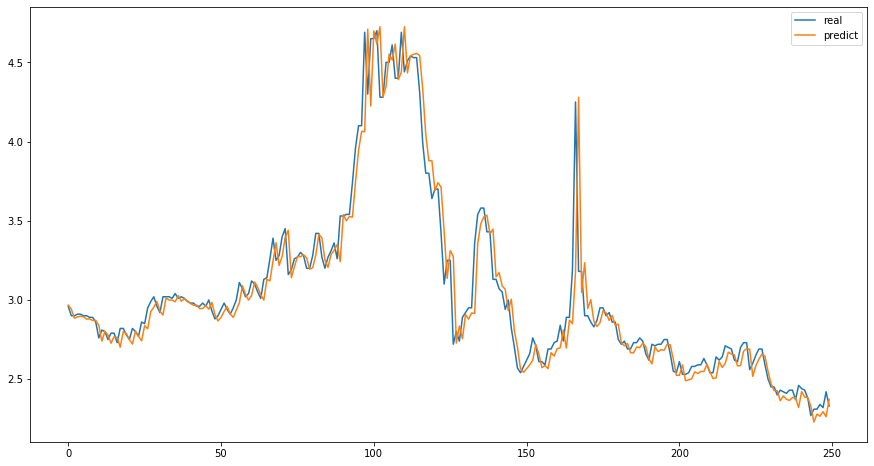

In [48]:
plt.figure(figsize=(15, 8))
plt.plot(y_forecast)
plt.plot(forecast_result)

plt.legend(['real', 'predict'])

In [49]:
y_predict = np.zeros(250)
for i in range(len(forecast_result)):
    y_predict[i] = forecast_result[i]

mape1 = np.abs((y_forecast - y_predict)/(y_forecast+0.00000001))

mape2 = 0
for i in range(len(mape1)):
    mape2 += mape1[i]

mape3 = 100 * (mape2 / len(mape1))
mape3

2.6774587487931036